In [19]:
import numpy as np
import tensorly as tl
import sparse
import itertools
import networkx as nx
import random as rdm
from sklearn import metrics
from itertools import combinations

LOAD GRAPH

In [11]:
# these data are from https://github.com/arbenson/ScHoLP-Data
# example: [{'edge': ['1', '2'], 'size': 2, 'time': 48942985907},...]
def load_data(directory):
    f_nedge = open(directory + '-nverts.txt', "r")
    f_edge = open(directory + '-simplices.txt', "r")
    f_time = open(directory + '-times.txt', "r")
    #f_label = open(directory + '-simplex-labels.txt', "r")
    result = []
    nodes = set()
    for n in f_nedge:
        size = int(n.rstrip('\n'))
        edge = []
        for v in range(size):
            node = int(f_edge.readline().rstrip('\n'))
            edge.append(node)
            nodes.add(node)
        time = int(f_time.readline().rstrip('\n'))
        #label = f_label.readline().rstrip('\n')
        result.append({'size':size, 'edge':edge, 'time':time})
    f_nedge.close()
    f_edge.close()
    f_time.close()
    #f_label.close()
    print("total number of nodes:", len(nodes))
    return nodes, result

directory = 'tags-ask-ubuntu/tags-ask-ubuntu'
#load_data(directory)

In [8]:
# return weighted graph 
# split by timestamps 
def edge_list(timestamped_edges, ratio = 1, max_dimension = 5):
    result = {}
    size = int(len(timestamped_edges) * ratio)
    for i in range(max_dimension):
        result[i+1] = {}
    #print(result)
    for e in timestamped_edges[:size]:
        if e['size'] <= max_dimension:
            sorted_e = tuple(sorted(e['edge']))
            if sorted_e in result[e['size']].keys():
                result[e['size']][sorted_e] += 1
            else:
                result[e['size']][sorted_e] = 1
    return result

In [9]:
# generate features 
# example input: (edgelist, 4, [3,2]), output ([order3...order3, order2...order2], order4)
# 
def cross_order_features(edgelist, higher_order, lower_orders):
    return null

In [12]:
nodes, timestamped_edges = load_data(directory)
#timestamped_edges

total number of nodes: 3029


In [20]:
edgelist_full = edge_list(timestamped_edges)
# edgelist_0_5 = edge_list(timestamped_edges, ratio = 0.5)

In [37]:
#edgelist_full

MERGE LAYERS

In [78]:
# convert higher-order edges into order-2 subedges
# def newdic(n): 
def order2_subedges(edgelist, dimension): # do not use global variable within funciton
    dic = {}
    for line, weight in edgelist[dimension].items():
        alist = list(combinations(line,2))
        for pair in alist:
            '''
            dic[pair] = weight
            ''' 
            if pair in dic.keys(): # different higher-order edges may have same subedges
                dic[pair] += weight
            else:
                dic[pair] = weight
    return dic
# print(edgelist_full[3])
# print(newdic(3))

In [30]:
# combine two order-2 edgelists into one dict
def merge_order2_edgelists(dict1, dict2): 
    newdic = dict1 # do not overwrite values outside the function
    for key in dict2: 
        if key in dict1: 
            newdic[key] = dict1[key] + dict2[key] 
        else: 
            newdic[key] = dict2[key]
    return newdic

In [79]:
#1. 把G3,4,5都放到G2 用networkx的数据结构
#2. 用spectrak clustering算法
#3. NMI
G_2 = edgelist_full[2]
edgelist_full[2][(3,4)]

45

In [80]:
# add three dimensional data to current two dimensional dataset
G_3_subedges = order2_subedges(edgelist_full, 3)
G_23 = merge_order2_edgelists(G_3_subedges, G_2)
G_23[(3,4)]

107

In [81]:
# add four dimensional data to current two dimensional dataset
G_4_subedges = order2_subedges(edgelist_full, 4)
G_234 = merge_order2_edgelists(G_4_subedges, G_23)
G_234[(3,4)]

164

In [82]:
# add five dimensional data to current two dimensional dataset
G_5_subedges = order2_subedges(edgelist_full, 5)
G_2345 = merge_order2_edgelists(G_5_subedges, G_234)
G_2345[(3,4)]

198

SPECTRAL ANALYSIS

In [47]:
#1. G3,4,5 to G2 
#2. networkx
#3. spectrak clustering
#4. NMI
#G_2
from sklearn.cluster import SpectralClustering
from sklearn import metrics

In [68]:
# build weighted graph using networkx
# input: dict, {(v1,v2):weight}
# output: graph, G
def build_graph(edgelist):
    G = nx.Graph()
    for pair, w in edgelist.items():
        G.add_edge(pair[0], pair[1], weight=w)
    return G
        
        
'''
    #add nodes and edges to Graph G
for pair, w in G_2.items():
    G.add_node(pair[0]) #add nodes
    G.add_node(pair[1])
    G.add_edge(pair[0],pair[1],weight=w) #add edges
'''

'\n    #add nodes and edges to Graph G\nfor pair, w in G_2.items():\n    G.add_node(pair[0]) #add nodes\n    G.add_node(pair[1])\n    G.add_edge(pair[0],pair[1],weight=w) #add edges\n'

In [ ]:
# 1. Eigenvalue distribution x-axis eigenvalue index in decreasing order, y-axis eigenvalues
# 2. KL-divergence, Jensen-Shannon divergence of 2 distributions. 

# spectral graph
def spectral(graph):
    ...
    return eigenvalues, eigenvectors
        

In [83]:
Graph_2 = build_graph(G_2)

In [89]:
nx.to_numpy_matrix(Graph_2)

matrix([[0., 5., 0., ..., 0., 0., 0.],
        [5., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
Graph_2.nodes()

NodeView((1, 2, 14, 15, 19, 20, 4, 21, 6, 29, 30, 9, 31, 34, 35, 39, 40, 50, 51, 16, 60, 53, 65, 61, 74, 77, 78, 81, 82, 43, 88, 98, 99, 122, 123, 124, 125, 131, 132, 8, 137, 141, 142, 145, 146, 154, 128, 169, 170, 171, 173, 174, 11, 175, 153, 176, 12, 179, 180, 41, 183, 184, 185, 26, 186, 57, 187, 190, 191, 199, 216, 217, 195, 220, 90, 159, 226, 228, 229, 231, 232, 85, 235, 109, 234, 241, 207, 238, 68, 215, 253, 155, 265, 160, 268, 177, 258, 218, 274, 260, 275, 269, 276, 119, 140, 279, 67, 280, 23, 59, 283, 291, 108, 172, 115, 294, 262, 297, 299, 18, 302, 305, 306, 56, 307, 196, 54, 73, 303, 310, 203, 89, 138, 319, 320, 245, 10, 315, 114, 70, 308, 121, 287, 329, 110, 111, 22, 254, 326, 202, 335, 143, 236, 149, 344, 105, 349, 166, 55, 333, 352, 129, 266, 150, 270, 192, 356, 364, 370, 263, 373, 249, 247, 281, 292, 374, 377, 86, 156, 380, 382, 383, 91, 388, 389, 392, 393, 96, 201, 395, 367, 396, 3, 27, 103, 48, 405, 409, 193, 410, 411, 412, 298, 66, 413, 257, 420, 421, 189, 422, 423, 424

In [84]:
Graph_2345 = build_graph(G_2345)

In [91]:
Graph_2345.nodes()

NodeView((9, 10, 11, 12, 13, 22, 73, 74, 75, 76, 19, 114, 115, 116, 117, 61, 131, 134, 135, 136, 6, 159, 37, 161, 162, 163, 164, 63, 81, 110, 169, 172, 2, 26, 41, 42, 49, 147, 192, 122, 155, 165, 202, 98, 221, 222, 108, 109, 112, 225, 129, 150, 270, 271, 272, 56, 167, 173, 197, 103, 397, 398, 128, 182, 389, 32, 34, 149, 414, 405, 160, 21, 67, 68, 70, 227, 265, 315, 85, 86, 88, 313, 140, 233, 308, 96, 381, 263, 422, 500, 7, 8, 66, 89, 208, 90, 177, 234, 353, 512, 534, 77, 146, 467, 540, 541, 153, 423, 509, 31, 71, 190, 552, 399, 559, 560, 156, 196, 241, 323, 282, 566, 420, 27, 187, 237, 223, 281, 528, 586, 571, 371, 601, 23, 95, 157, 364, 257, 454, 537, 28, 297, 52, 636, 637, 640, 53, 170, 494, 641, 91, 247, 646, 121, 154, 287, 248, 660, 668, 669, 62, 201, 674, 60, 290, 431, 309, 362, 269, 680, 681, 492, 307, 542, 615, 690, 69, 378, 379, 551, 48, 698, 702, 703, 704, 16, 383, 715, 468, 718, 719, 57, 488, 671, 469, 496, 579, 722, 614, 729, 689, 732, 55, 102, 175, 277, 376, 310, 457, 568, 

In [88]:
Graph_2345.edges()

EdgeView([(9, 10), (9, 11), (9, 12), (9, 13), (9, 6), (9, 22), (9, 61), (9, 159), (9, 98), (9, 221), (9, 222), (9, 103), (9, 397), (9, 398), (9, 153), (9, 160), (9, 423), (9, 509), (9, 571), (9, 52), (9, 636), (9, 637), (9, 77), (9, 195), (9, 282), (9, 757), (9, 34), (9, 190), (9, 206), (9, 799), (9, 63), (9, 128), (9, 820), (9, 404), (9, 545), (9, 713), (9, 830), (9, 1), (9, 53), (9, 157), (9, 129), (9, 387), (9, 767), (9, 223), (9, 604), (9, 340), (9, 531), (9, 89), (9, 130), (9, 305), (9, 306), (9, 96), (9, 371), (9, 399), (9, 906), (9, 929), (9, 248), (9, 278), (9, 381), (9, 182), (9, 1017), (9, 468), (9, 949), (9, 228), (9, 351), (9, 899), (9, 220), (9, 233), (9, 436), (9, 376), (9, 196), (9, 64), (9, 143), (9, 202), (9, 205), (9, 1152), (9, 815), (9, 1023), (9, 19), (9, 714), (9, 8), (9, 66), (9, 367), (9, 1192), (9, 458), (9, 345), (9, 407), (9, 426), (9, 41), (9, 118), (9, 155), (9, 46), (9, 249), (9, 122), (9, 123), (9, 37), (9, 1083), (9, 268), (9, 602), (9, 638), (9, 582), (

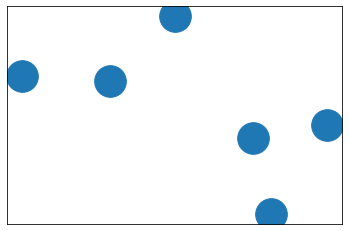

In [215]:
A = nx.Graph()
A.add_edge('a','b',weight=0.6)
A.add_edge('a','c',weight=0.2)
A.add_edge('c','d',weight=0.1)
A.add_edge('c','e',weight=0.7)
A.add_edge('c','f',weight=0.9)
A.add_edge('a','d',weight=0.3)
elarge = [(u,v) for (u,v,d) in A.edges(data=True) if d['weight']>0.5]
esmall = [(u,v) for (u,v,d) in A.edges(data=True) if d['weight']<0.5]
pos = nx.spring_layout(A, seed=17)
nx.draw_networkx_nodes(A,pos,node_size=1000)
